# Protein Biomarker Analysis

In [111]:
# import dependencies
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

## Preprocessing

In [112]:
# read in data
data = pd.read_csv(
  "https://raw.githubusercontent.com/pstat197/module-1-biomarker-data-table_ten/refs/heads/main/data/biomarker-raw.csv"
  )

# drop nuisance cols
data.drop(0, inplace=True)
data.drop(columns=["Target Full Name"], inplace=True)

# convert protein level data to float
group_col = data["Group"]
data.drop(columns=["Group"], inplace=True)
data = data.replace('-', pd.NA)
data.dropna(inplace=True)
data = data.astype(float)
data.head()

data.insert(0, "Group", group_col)

data.head()

,Group,E3 ubiquitin-protein ligase CHIP,CCAAT/enhancer-binding protein beta,Gamma-enolase,E3 SUMO-protein ligase PIAS4,Interleukin-10 receptor subunit alpha,Signal transducer and activator of transcription 3,Interferon regulatory factor 1,Transcription factor AP-1,Induced myeloid leukemia cell differentiation protein Mcl-1,...,Transgelin-2,"ATP synthase subunit O, mitochondrial",Pro-opiomelanocortin,Quinone oxidoreductase-like protein 1,Pigment epithelium-derived factor,Cathepsin F,Formimidoyltransferase-cyclodeaminase,Ubiquitin carboxyl-terminal hydrolase 25,Plexin-B2,ADOS Total Score
1,ASD,618.6,1489.3,732.7000,1229.6,1647.0,467.0,1041.0000,3114.2,1171.475,...,3016.2,2156.9,895.700,2313.6,24904.5,2048.7,3047.0875,1462.6,2024.1,8.0
2,ASD,512.2,1697.8,1556.3375,1484.3,1711.9,548.3,1213.8000,3188.0,868.500,...,3296.2,1813.6,555.000,1345.0,24201.3,2273.2,1918.9000,1708.0,2655.9,21.0
3,ASD,438.5,1121.7,857.3000,1419.4,1926.3,412.6,1222.3000,2373.1,1171.475,...,2875.7,1482.6,543.000,1980.2,20143.1,4092.6,501.2000,1386.4,3091.6,12.0
4,ASD,505.0,1209.7,1394.0000,1036.1,1551.6,523.3,1654.7125,2652.5,764.100,...,3096.2,1399.8,929.775,1711.1,27553.1,2979.8,1040.4000,1508.9,2166.9,20.0
5,ASD,440.7,1120.2,885.0000,925.8,1518.5,523.9,1422.4000,2373.8,647.900,...,3282.5,1439.8,619.600,1497.2,27775.2,2720.1,1312.6000,1445.9,2887.4,22.0


## Why perform a log-transform on protein levels?

Randomly selected proteins: ['Retinoblastoma-associated protein', 'Extracellular superoxide dismutase [Cu-Zn]', 'Transforming growth factor beta-1']


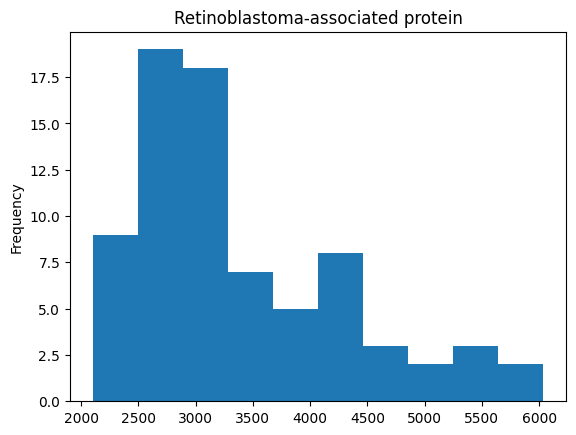

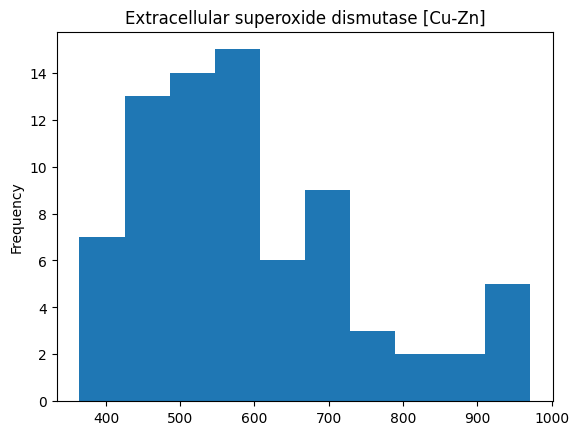

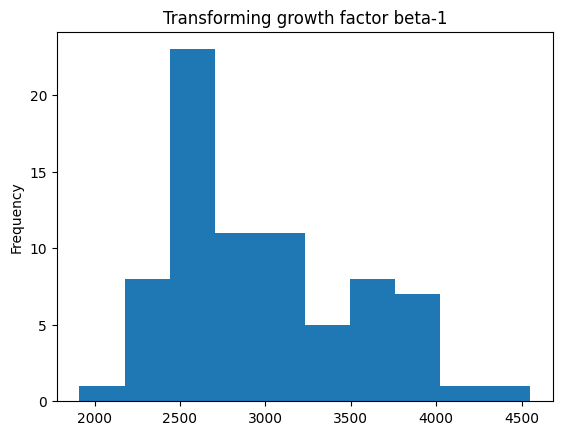

In [113]:
# Sample 3 random proteins
proteins = data.columns
# Exclude the 'Group' column as it is not numeric
numeric_proteins = proteins.drop('Group')
random_proteins = random.sample(list(numeric_proteins), 3)
print("Randomly selected proteins:", random_proteins)


random_protein_levels = data[random_proteins]

for protein in random_proteins:
    plt.figure()
    random_protein_levels[protein].plot(kind="hist", title=protein)

From the above plot, we can see that protein levels tend to have a right skew. By applying a log-transformation, the data should closely represent a normal distribution, making it suitable for inference.

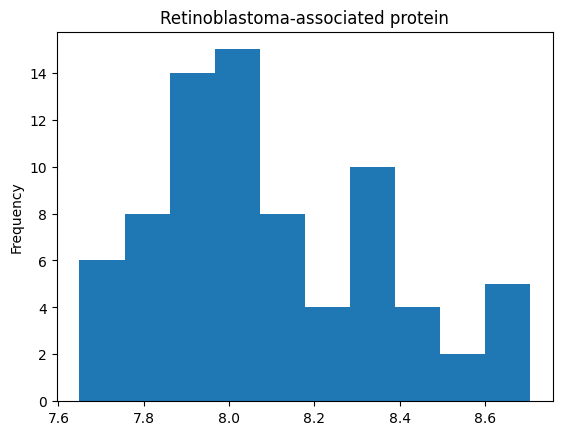

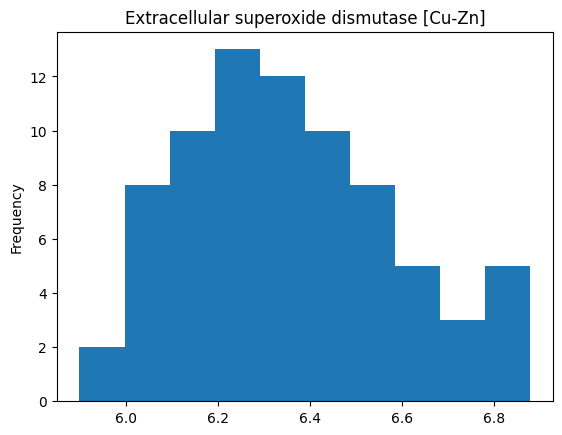

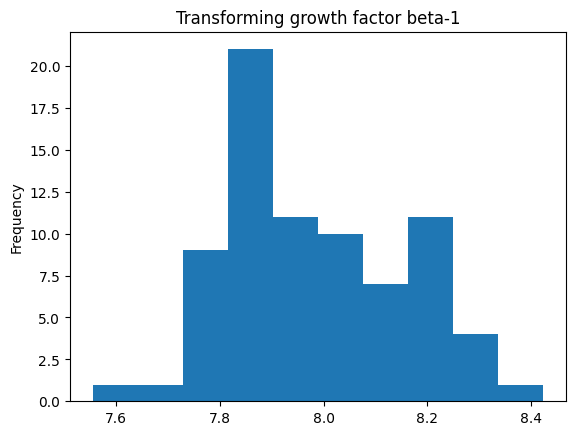

In [114]:
# perform log transform
data.drop(columns=["Group"], inplace=True)
data = np.log(data)
data.insert(0, "Group", group_col)

# plot transformed previously selected proteins for comparison

random_protein_levels = data[random_proteins]

for protein in random_proteins:
    plt.figure()
    random_protein_levels[protein].plot(kind="hist", title=protein)

The log transformation has successfully addressed the right-skewed problem, producing normalized data.

## Outliers

In [115]:
# clip outliers
def clip_outliers(col):
    if col.name == 'Group':
        return col
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return col.clip(lower, upper)

data = data.apply(clip_outliers)